In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle
from algs_lib import *
from math import comb

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
# plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=True)

In [290]:
mi = 0.015625
noise_dict = pickle.load(open(f'hybrid_data/iris_kmeans_acc.pkl', 'rb'))
iso_noise_dict = pickle.load(open('hybrid_data/iris_iso_kmeans_acc.pkl', 'rb'))

# tmp = pickle.load(open(f'data_0120/iris_kmeans_big=False_noise.pkl', 'rb'))
# print(noise_dict[0.02], noise_dict[1.0])
# noise_dict.update(tmp)
print(noise_dict)
print(iso_noise_dict)

{4.0: (0.8912040816326531, 0.012257159100374846, 0.8906938775510205, 0.012251255310287383), 2.0: (0.8876734693877552, 0.012654720533111204, 0.8873469387755101, 0.012617909204498129), 1.0: (0.8899183673469387, 0.012368498125780928, 0.8891224489795919, 0.012367976259891712), 0.5: (0.8954285714285715, 0.009677894210745525, 0.8901020408163265, 0.0093472615576843), 0.25: (0.8892857142857142, 0.012335849645980843, 0.8586938775510204, 0.012863067055393588), 0.125: (0.8843673469387754, 0.014377527696793006, 0.7691224489795918, 0.01879176634735527), 0.0625: (0.896, 0.009475545189504374, 0.6218367346938776, 0.016469429404414825), 0.03125: (0.8913673469387755, 0.011787867971678467, 0.4690204081632653, 0.019962380674718866), 0.015625: (0.8824081632653061, 0.016090527280299874, 0.3820408163265306, 0.00762832153269471)}
{4.0: (0.8861632653061224, 0.013122830487296962, 0.886326530612245, 0.013109162848812993), 2.0: (0.8913673469387754, 0.011360546022490627, 0.8915918367346939, 0.01133721615993336), 1

In [292]:
fname = 'hybrid_data/{}_baselines.pkl'

for data in ['iris', 'rice', 'bean', 'cifar10']:
    print(data, pickle.load(open(fname.format(data), 'rb')))
    


iris {'kmeans': 0.9015714285714405, 'svm': {1.0: 0.9591836734693955, 0.05: 0.7142857142857043}, 'dt': {(None, 0, 1.0): 0.9066326530612353, (0.01, 0.1, 0.95): 0.9037959183673582}, 'pca': {1: 0.2060303453624783, 2: 0.10858815750013762}}
rice {'kmeans': 0.9194395796847631, 'svm': {1.0: 0.9308231173380125, 0.05: 0.9316987740805793}, 'dt': {(None, 0, 1.0): 0.9181663747810851, (0.01, 0.35, 0.51): 0.8996059544658511}, 'pca': {1: 0.18611901921815577, 6: 0.0023146231348407233}}
bean {'kmeans': 0.7314043595395553, 'svm': {1.0: 0.9179524859172246, 0.05: 0.9088905216752576}, 'pca': {1: 0.17301997993064594, 8: 0.008035484748637453}}
cifar10 {'pca': {1: 0.3899007380447762, 14: 0.2537465389574448}}


[0.896, 0.896, 0.896, 0.896, 0.896, 0.896, 0.896, 0.896, 0.896]
[0.9207775831873906, 0.9207775831873906, 0.9207775831873906, 0.9207775831873906, 0.9207775831873906, 0.9207775831873906, 0.9207775831873906, 0.9207775831873906, 0.9207775831873906]
[0.7396816066617683, 0.7396816066617683, 0.7396816066617683, 0.7396816066617683, 0.7396816066617683, 0.7396816066617683, 0.7396816066617683, 0.7396816066617683, 0.7396816066617683]


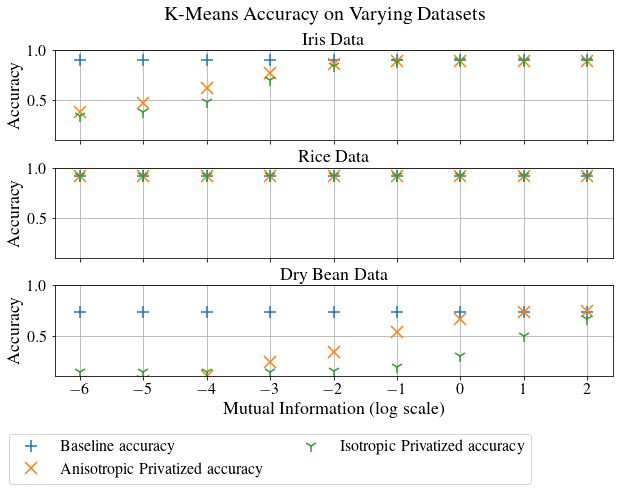

In [293]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
hybrid_fnames = ["hybrid_data/iris_kmeans_acc.pkl",
          "hybrid_data/rice_kmeans_acc.pkl",
          "hybrid_data/bean_kmeans_acc.pkl"]
iso_fnames = ["hybrid_data/iris_iso_kmeans_acc.pkl",
             "hybrid_data/rice_iso_kmeans_acc.pkl",
             "hybrid_data/bean_iso_kmeans_acc.pkl"]

baseline_vals = [0.9015714285714405, 0.9194395796847631, 0.7314043595395553]
data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))



for ind, data in enumerate(data_types):
    hybrid_acc_dict = pickle.load(open(hybrid_fnames[ind], 'rb'))
    iso_acc_dict = pickle.load(open(iso_fnames[ind], 'rb'))
    ax = axes[ind]
    sorted_keys = sorted(hybrid_acc_dict.keys())
    subsampling_ys = [max(hybrid_acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print(subsampling_ys)
    hybrid_priv_ys = [hybrid_acc_dict[k][2] for k in sorted_keys]
#     print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][2] for k in sorted_keys]
#     print(subsampling_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
#     ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    
    y_min, y_max = 0.1, 1.0
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("K-Means Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/mi_kmeans.png', bbox_inches = "tight")


# SVM

In [319]:
fname = 'hybrid_data/bean_acc_small_mi=0.0625.pkl'
pickle.load(open(fname, 'rb'))

{0.005: (0.7478099436688728, 0.6684871418074942),
 0.01: (0.8091545432280146, 0.5941912809208915)}

[0.35520408163265094, 0.3772653061224465, 0.40932653061224333, 0.47722448979591764, 0.5877346938775511, 0.7208367346938773, 0.8216326530612286, 0.8811632653061323, 0.902428571428582]
[0.5493581436077057, 0.5963677758318731, 0.6764982486865138, 0.7796821366024526, 0.8658782837127844, 0.9055402802101584, 0.9163817863397562, 0.9199509632224137, 0.9209404553414996]
[0.15403110457996563, 0.15698040656380108, 0.16019985304922849, 0.163649767327945, 0.17902596130296378, 0.20486651971589562, 0.2567869213813379, 0.35106147440607405, 0.5273345579230955]


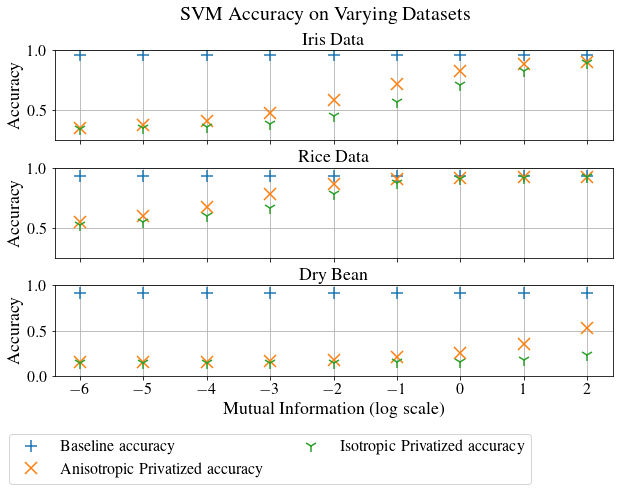

In [320]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
fnames = ["hybrid_data/iris_acc_mi={}.pkl",
          "hybrid_data/rice_acc_mi={}.pkl",
         "hybrid_data/bean_acc_mi={}.pkl"]

iso_fnames = ["hybrid_data/iris_iso_acc_mi={}.pkl",
          "hybrid_data/rice_iso_acc_mi={}.pkl",
             "hybrid_data/bean_iso_acc_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.9591836734693955, 0.9308231173380125, 0.9179524859172246]

# reg = 0.05
C_vals = [1.0, 1.0, 1.0]
ys = [(0.25, 1.), (0.25, 1.), (0, 1)]

for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[C_vals[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[C_vals[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0.25, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("SVM Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/mi_svm_naive.png', bbox_inches = "tight")


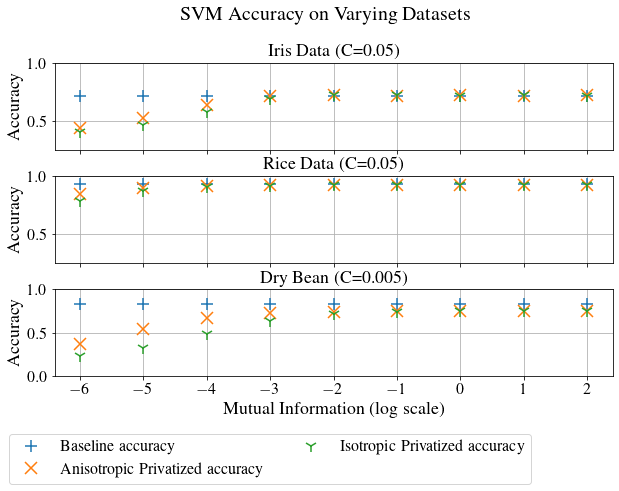

In [322]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
fnames = ["hybrid_data/iris_acc_mi={}.pkl",
          "hybrid_data/rice_acc_mi={}.pkl",
         "hybrid_data/bean_acc_small_mi={}.pkl"]

iso_fnames = ["hybrid_data/iris_iso_acc_mi={}.pkl",
          "hybrid_data/rice_iso_acc_mi={}.pkl",
             "hybrid_data/bean_iso_acc_small_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data (C=0.05)", "Rice Data (C=0.05)", "Dry Bean (C=0.005)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.7142857142857043, 0.9316987740805793, 0.8224344844477134]
# reg = 0.05
C_vals = [0.05, 0.05, 0.005]
ys = [(0.25, 1.), (0.25, 1.), (0, 1)]


for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[C_vals[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[C_vals[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
#     print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0.25, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("SVM Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/mi_svm_reg.png', bbox_inches = "tight")


# DT

nonprivate [0.8921632653061334, 0.8921632653061334, 0.8921632653061334, 0.8921632653061334, 0.8921632653061334, 0.8921632653061334, 0.8921632653061334, 0.8921632653061334, 0.8921632653061334]
aniso [0.3745714285714241, 0.37153061224489287, 0.3801428571428518, 0.3941836734693835, 0.43287755102040365, 0.4684693877550993, 0.5372653061224472, 0.6606326530612249, 0.7787551020408197]
nonprivate [0.9220823117338008, 0.9220823117338008, 0.9220823117338008, 0.9220823117338008, 0.9220823117338008, 0.9220823117338008, 0.9220823117338008, 0.9220823117338008, 0.9220823117338008]
aniso [0.6392889667250433, 0.6384781085814364, 0.6541908931698763, 0.6648476357267952, 0.6909080560420302, 0.7473283712784591, 0.7832206654991234, 0.8304264448336239, 0.8880394045534155]


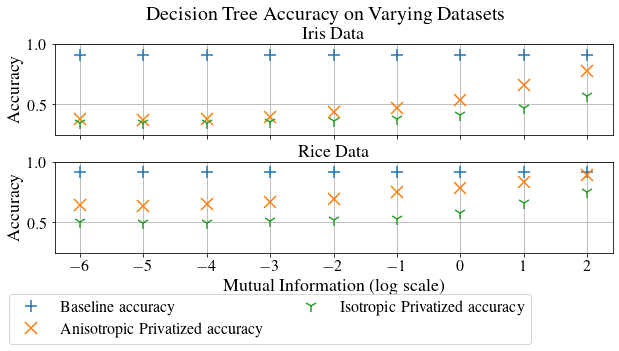

In [3]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(None, 0, 1.0), (None, 0, 1.0)]
fnames = ["hybrid_data/iris_acc_auto_reg={}_mi={}.pkl",
          "hybrid_data/rice_acc_auto_reg={}_mi={}.pkl"]
# iris_iso_acc_auto_reg=(0.01, 0.1, 0.95)_mi=0.015625.pkl	
iso_fnames = ["hybrid_data/iris_iso_acc_auto_reg={}_mi={}.pkl",
          "hybrid_data/rice_iso_acc_auto_reg={}_mi={}.pkl"]

data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 4))

baseline_vals = [0.9066326530612353, 0.9181663747810851]

for ind, data in enumerate(data_types):
#     if ind == 0:
#         continue
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('nonprivate', subsampling_ys)
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Decision Tree Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/dt_naive.png', bbox_inches = "tight")


hybrid_data/iris_iso_acc_auto_1e-6_reg=(0.01, 0.45, 0.8)_mi=4.0.pkl
nonprivate [0.7484693877551, 0.7484693877551, 0.7484693877551, 0.7484693877551, 0.7484693877551, 0.7484693877551, 0.7484693877551, 0.7484693877551, 0.7484693877551]
aniso [0.5018367346938748, 0.5633469387755102, 0.6217142857142861, 0.680693877551021, 0.7198163265306102, 0.723326530612242, 0.7361020408163255, 0.7387755102040803, 0.7402244897959178]
hybrid_data/rice_iso_acc_auto_reg=(0.01, 0.35, 0.51)_mi=4.0.pkl
nonprivate [0.9033309982486843, 0.9033309982486843, 0.9033309982486843, 0.9033309982486843, 0.9033309982486843, 0.9033309982486843, 0.9033309982486843, 0.9033309982486843, 0.9033309982486843]
aniso [0.8934229422066481, 0.8939238178633967, 0.8887425569176882, 0.8962513134851136, 0.9005061295971981, 0.9033309982486843, 0.8959719789842397, 0.8859457092819618, 0.898457092819615]


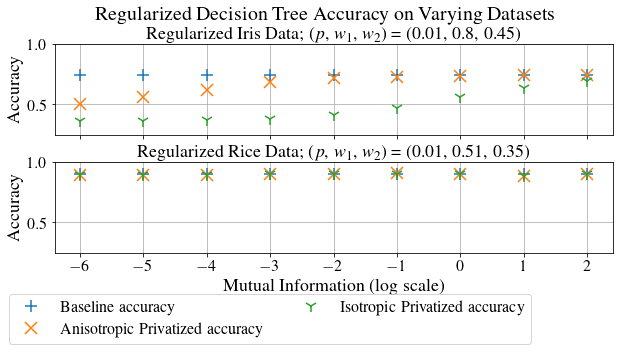

In [5]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(0.01, 0.45, 0.8), (0.01, 0.35, 0.51)]
fnames = ["hybrid_data/iris_acc_auto_1e-6_reg={}_mi={}.pkl",
          "hybrid_data/rice_acc_auto_reg={}_mi={}.pkl"]

iso_fnames = ["hybrid_data/iris_iso_acc_auto_1e-6_reg={}_mi={}.pkl",
          "hybrid_data/rice_iso_acc_auto_reg={}_mi={}.pkl"]

data_types = ['iris', 'rice']
titles = ["Regularized Iris Data; ($p$, $w_1$, $w_2$) = (0.01, 0.8, 0.45)", "Regularized Rice Data; ($p$, $w_1$, $w_2$) = (0.01, 0.51, 0.35)"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 4))

baseline_vals = [0.7439183673469384, 0.8996059544658511]

for ind, data in enumerate(data_types):
#     if ind == 0:
#         continue
    print(iso_fnames[ind].format(regs[ind], mi))
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print('nonprivate', subsampling_ys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Regularized Decision Tree Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/dt_reg.png', bbox_inches = "tight")


In [303]:
test_mi = 2**(-6)
tested_regs_iris = [(None, 0, 1.0)]
for reg in tested_regs_iris:
    acc = pickle.load(open(fnames[0].format(reg, test_mi), 'rb'))[reg]
    print(reg, acc)

(None, 0, 1.0) (0.8913061224489909, 0.3745714285714241)


# PCA

[0.1842822735130577, 0.18418813211025722, 0.1841592729671345, 0.18416678558171415, 0.18416134334157927, 0.1841438045153124, 0.18415866542188866, 0.18415454113032245, 0.18416100395161664]
[0.16977235438041682, 0.1694197773347657, 0.16933359895298156, 0.16931585598154875, 0.16930714840704225, 0.16930653288599895, 0.16930324064819627, 0.16930510071609708, 0.16931238916571123]
[0.3907869544671741, 0.39012849187822646, 0.38996375898280544, 0.3899230446168104, 0.3899128568642773, 0.38991003206744984, 0.38990955834879604, 0.3899090651588734, 0.3899089380266116]


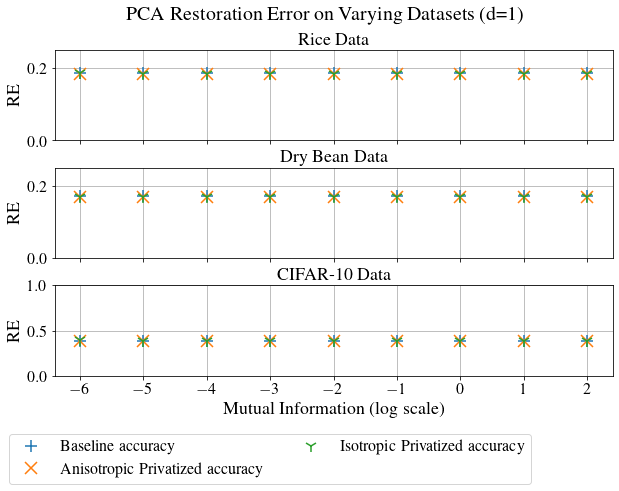

In [305]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# 

fnames = ["hybrid_data/rice_pca_dist_mi_{}.pkl",
          "hybrid_data/bean_pca_dist_mi_{}.pkl",
          "hybrid_data/cifar10_pca_dist_mi_{}.pkl"]

iso_fnames = ["hybrid_data/rice_iso_pca_dist_mi_{}.pkl",
            "hybrid_data/bean_iso_pca_dist_mi_{}.pkl",
          "hybrid_data/iso_cifar10_pca_dist_d=1_mi_{}.pkl"]

data_types = ['Rice', 'Bean', 'CIFAR-10']
titles = ["Rice Data", "Dry Bean Data", "CIFAR-10 Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.18611901921815577, 0.17301997993064594, 0.3899007380447762]
dim = 1
ys = [(0, 0.25), (0, 0.25), (0, 1)]
for ind, data in enumerate(data_types):
#     if ind == 2:
#         continue
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[dim]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[dim]
    ax = axes[ind]
    acc_dict = {}
#     iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [min(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline RE")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized RE")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0, 0.6
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("RE", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (d=1)", fontsize=20)
plt.savefig('hybrid_figs/pca_d=1.png', bbox_inches = "tight")

# print(pickle.load(open(fnames[0].format(true_x_vals[0]), 'rb')))

aniso [0.2626789570286009, 0.11078074492271649, 0.05263437867554356, 0.026100793207546154, 0.013254071903142163, 0.006934974665105067, 0.004068870591195887, 0.0028806958422521005, 0.0024974594207967395]
iso [1.086719515811381, 0.40029452334277027, 0.17702230931432458, 0.08471966790972188, 0.04267385936081931, 0.021243682063026577, 0.010844558300284891, 0.005817150938948926, 0.0035818805537995695]
aniso [0.46249244460510797, 0.17031704383389384, 0.07588033107713642, 0.037096460801577136, 0.01971056787087742, 0.011768829755738721, 0.008769402260006961, 0.007859044857805753, 0.007602898155716494]
iso [4.501949203838446, 1.2589644507043967, 0.44435912219530627, 0.1936032154304513, 0.0928839041288703, 0.04689115349995849, 0.02418131232626297, 0.01370693043731746, 0.009426471237024715]
aniso [0.4249217279974773, 0.3606393952961997, 0.3428150785160686, 0.33821265302414094, 0.3370555226856385, 0.3367651679658732, 0.33669260783109345, 0.33667445244865446, 0.33666986458477144]
iso [0.85722526763

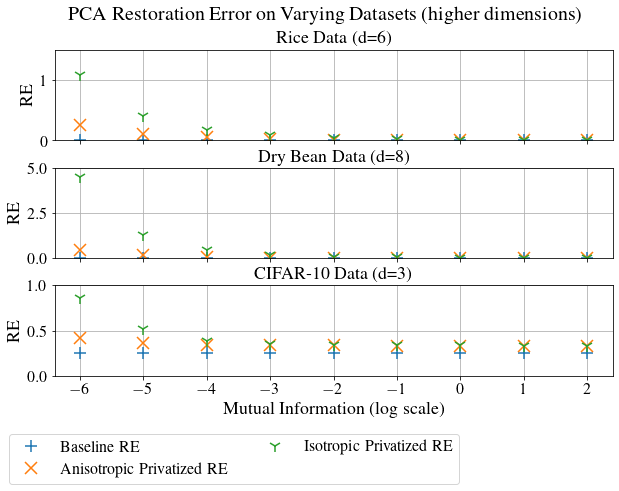

In [310]:
true_x_vals = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# 0.015625, 0.03125, 0.0625, 0.125, 

fnames = ["hybrid_data/rice_pca_dist_mi_{}.pkl",
          "hybrid_data/bean_pca_dist_mi_{}.pkl",
          "hybrid_data/cifar10_pca_dist_d=3_mi_{}.pkl"]

iso_fnames = ["hybrid_data/rice_iso_pca_dist_mi_{}.pkl",
              "hybrid_data/bean_iso_pca_dist_mi_{}.pkl",
          "hybrid_data/iso_cifar10_pca_dist_d=3_mi_{}.pkl"]

data_types = ['Rice', 'Bean', 'CIFAR-10']
titles = ["Rice Data (d=6)", "Dry Bean Data (d=8)", "CIFAR-10 Data (d=3)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
ys = [(0, 1.5), (0, 5), (0, 1)]
baseline_vals = [0.0023146231348407233, 0.008035484748637453, 0.2537465389574448]

dims = [6, 8, 3]
for ind, data in enumerate(data_types):
#     if ind == 2:
#         continue
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[dims[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[dims[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [min(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    print('iso', iso_priv_ys)
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline RE")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized RE")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized RE")
    y_min, y_max = 0, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("RE", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (higher dimensions)", fontsize=20)
plt.savefig('hybrid_figs/pca_higher_dims.png', bbox_inches = "tight")

# print(pickle.load(open(fnames[0].format(true_x_vals[0]), 'rb')))

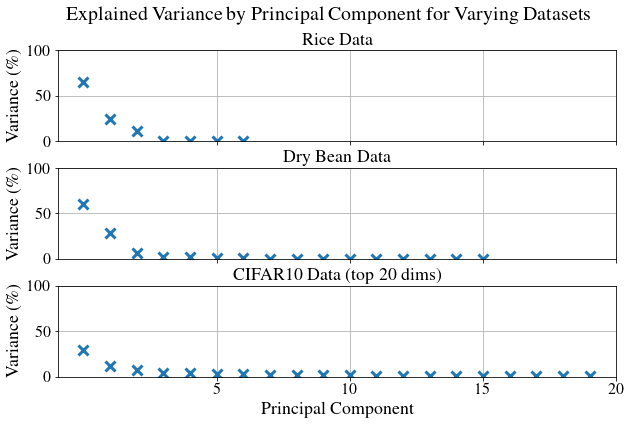

In [311]:
rice_explained_var = [0.6506242290857337, 0.2372633109725393, 0.10945811696346038, 0.0016024579005626536, 0.000758034322984308, 0.00023861549769212874, 5.5235257027472814e-05]
bean_explained_var = [0.6033534165855733, 0.2785851256823293, 0.06122808727678942, 0.024138050359287788, 0.014463903503995752, 0.009719681204229046, 0.006239885715097228, 0.0014478965394851668, 0.0006314652070022946, 9.090695272258236e-05, 7.09415067980201e-05, 1.94233847840926e-05, 1.0441654611948668e-05, 4.7370085481391416e-07, 1.998135295672295e-07, 1.0091290977246153e-07]
cifar10_explained_var = [0.2907662989056515, 0.11253143677034393, 0.06694413963578165, 0.036764588576939025, 0.036088429234138165, 0.028092298273312506, 0.027129920468951633, 0.021671624962741214, 0.020646414039878113, 0.014380014944903246, 0.013105627525556267, 0.010659784252032716, 0.010499812362189248, 0.010042685183294563, 0.00918482261730212, 0.008174001500280186, 0.007396079040473611, 0.007161298663178033, 0.006874716141505839, 0.006432434693362856]
rice_var_pct = [100.*k for k in rice_explained_var]
bean_var_pct = [100.*k for k in bean_explained_var]
cifar10_var_pct = [100.*k for k in cifar10_explained_var]


data_types = ['rice', 'bean', 'cifar10']
titles = ["Rice Data", "Dry Bean Data", "CIFAR10 Data (top 20 dims)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))

y_vals = [rice_var_pct, bean_var_pct, cifar10_var_pct]
for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}

    ax.plot(range(len(y_vals[ind])), y_vals[ind], 'x', markersize=10, mew=3.)
    y_min, y_max = 0, 100
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Variance (\%)", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.set_xticks([5, 10, 15, 20]) 
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
# lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.1))
plt.xlabel("Principal Component", fontsize=18)

plt.suptitle("Explained Variance by Principal Component for Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/pca_explained_var.png', bbox_inches = "tight")

In [169]:
fname = 'hybrid_data/rice_pca_dist_mi_0.015625.pkl'

In [171]:
pickle.load(open(fname, 'rb'))

{1: (0.18844460206439692, 0.18846382614360194),
 2: (0.10593781220710141, 0.10646744393120865),
 3: (0.016733128481800513, 0.02289495832348949),
 4: (0.010826754966129656, 0.027368535313609898),
 5: (0.005385209607202744, 0.03526519489368923),
 6: (0.0024141423674964033, 0.03901400633656587)}

In [224]:
fname = 'hybrid_data/iris_kmeans_ys.pkl'
var_dict = pickle.load(open(fname, 'rb'))

In [230]:
fname = 'hybrid_data/iris_kmeans_ys.pkl'
var_dict = pickle.load(open(fname, 'rb'))

ind = 0

variances = {}
variances['km'] = []
variances[1.0] = []
variances[0.05] = []

for i in range(2, len(var_dict[0])):
    variances['km'].append(np.var(var_dict[0][:i]))
    
fname = 'hybrid_data/iris_svm_ys.pkl'
var_dict = pickle.load(open(fname, 'rb'))

for C in [0.05, 1.0]:
    for i in range(2, len(var_dict[C][0])):
        variances[C].append(np.var(var_dict[C][0][:i]))

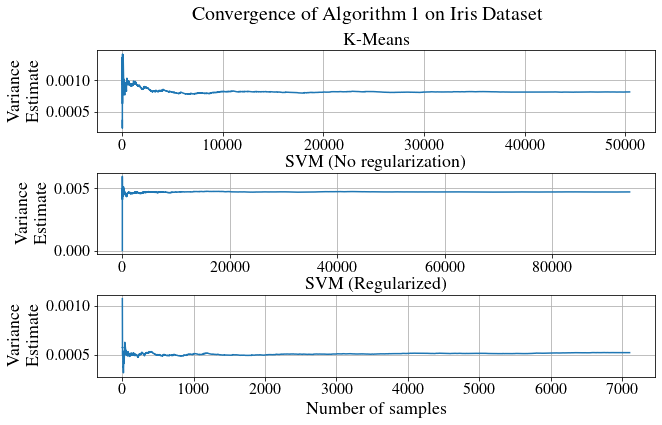

In [248]:
data_types = ['km', 1.0, 0.05]
titles = ["K-Means", "SVM (No regularization)", "SVM (Regularized)"]
fig, axes = plt.subplots(3, figsize=(10, 6))

for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}
    curr_var_ests = variances[data_types[ind]]

    ax.plot(range(len(curr_var_ests)), curr_var_ests)
#     y_min, y_max = 0, 100
#     ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Variance\nEstimate", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
    
plt.subplots_adjust(hspace=0.5)
handles, labels = ax.get_legend_handles_labels()
# lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.1))
plt.xlabel("Number of samples", fontsize=18)

plt.suptitle("Convergence of Algorithm 1 on Iris Dataset", fontsize=20)
# plt.show()
plt.savefig('hybrid_figs/alg_convergence.png', bbox_inches = "tight")

In [231]:
variances.keys()

dict_keys(['km', 1.0, 0.05])